## 数据探索与可视化

### 实验目标
- 学习并掌握如何使用Python进行数据探索与可视化。
- 理解并应用数据探索的基本方法，包括数据清洗、格式化和描述性统计分析。
- 使用Matplotlib和Seaborn等可视化工具，绘制不同类型的图表，分析数据分布及特征之间的关系。
- 利用pandas_profiling生成数据的交互式报告，全面了解数据的分布、缺失值和异常值。

### 实验要求

1. 使用pandas读取数据集github_bot_processed_data.csv。探索pandas的显示选项，以便查看更多数据行和列。
2. 使用head()方法查看数据的前几行，并使用info()方法查看每列的数据类型，观察两者的区别。
使用describe()方法生成数据的描述性统计信息。
3. 对数据进行格式化处理，并展示不同格式（例如，日期、货币、百分比等）的效果。
4. 对public_repos、public_gists、followers、following等列进行对数变换，并查看其影响。
5. 使用Matplotlib绘制图表
    - 绘制条形图：展示label列的类别分布。
    - 绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布。
    - 绘制直方图：展示log_public_repos的对数变换后的数据分布。
    - 绘制散点图：展示public_repos与followers之间的关系。
    - 绘制散点矩阵：展示多个数值型特征之间的成对关系。
6. 使用Seaborn绘制图表
    - 绘制箱线图：展示不同label类别下log_followers的分布。
    - 绘制成对图：展示不同特征之间的成对关系，并根据label分类。
    - 绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性。
    - 绘制小提琴图：展示label与log_followers之间的分布差异。
7. 使用pandas_profiling.ProfileReport()生成交互式数据分析报告，分析数据的统计分布、缺失值、异常值等。

In [24]:
import pandas as pd

pd.set_option('display.max_rows',50)
pd.set_option('display.max_columns',50)
pd.set_option('display.width',1000)
data=pd.read_csv('github_bot_processed_data.csv')
print(data.head())

print(data.info())

print(data.describe())

   label  type  site_admin  company   blog  location  hireable                                                bio  public_repos  public_gists  followers  following                 created_at                 updated_at  text_bot_count
0  Human  True       False    False  False     False     False                                                NaN            26             1          5          1  2011-09-26 17:27:03+00:00  2023-10-13 11:21:10+00:00               0
1  Human  True       False    False   True     False      True  I just press the buttons randomly, and the pro...            30             3          9          6  2015-06-29 10:12:46+00:00  2023-10-07 06:26:14+00:00               0
2  Human  True       False     True   True      True      True         Time is unimportant,\nonly life important.           103            49       1212        221  2008-08-29 16:20:03+00:00  2023-10-02 02:11:21+00:00               0
3    Bot  True       False    False  False      True     False  

In [23]:
import pandas as pd
import numpy as np
data=pd.read_csv('github_bot_processed_data.csv') 

data['created_at']=pd.to_datetime(data['created_at']) #日期

print(data['created_at'])

data['log_public_repos']=data['public_repos'].apply(lambda x:np.log(x+1))  #对数变换
data['log_public_gists']=data['public_gists'].apply(lambda x:np.log(x+1))
data['log_followers']=data['followers'].apply(lambda x:np.log(x+1))
data['log_following']=data['following'].apply(lambda x:np.log(x+1))

# 查看对数变换后的影响
print(data[['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']].head())

0       2011-09-26 17:27:03+00:00
1       2015-06-29 10:12:46+00:00
2       2008-08-29 16:20:03+00:00
3       2014-05-20 18:43:09+00:00
4       2012-08-16 14:19:13+00:00
                   ...           
19763   2014-07-02 23:27:34+00:00
19764   2017-12-06 21:56:31+00:00
19765   2015-11-14 14:44:05+00:00
19766   2021-11-23 18:55:29+00:00
19767   2016-04-22 22:11:59+00:00
Name: created_at, Length: 19768, dtype: datetime64[ns, UTC]
   log_public_repos  log_public_gists  log_followers  log_following
0          3.295837          0.693147       1.791759       0.693147
1          3.433987          1.386294       2.302585       1.945910
2          4.644391          3.912023       7.100852       5.402677
3          3.912023          0.000000       4.442651       1.098612
4          2.484907          0.693147       1.945910       1.098612


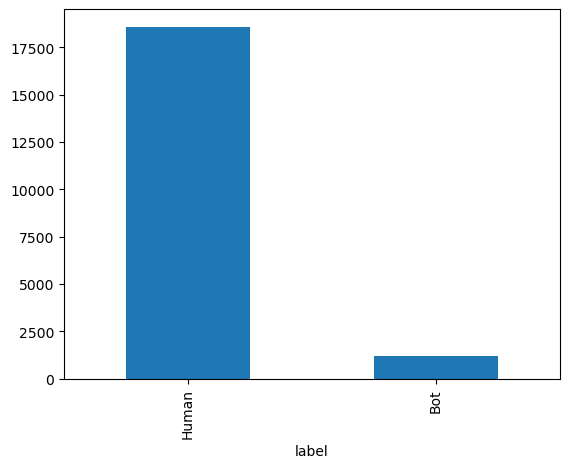

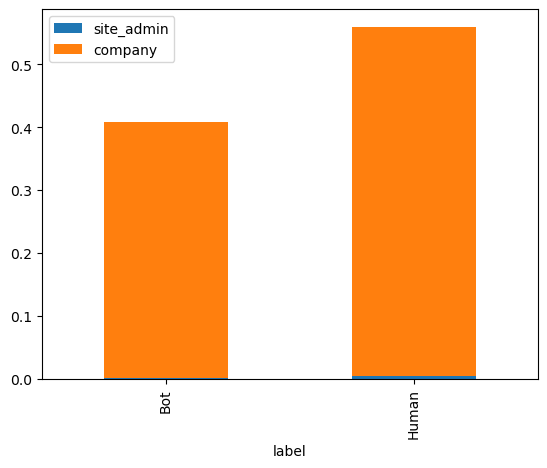

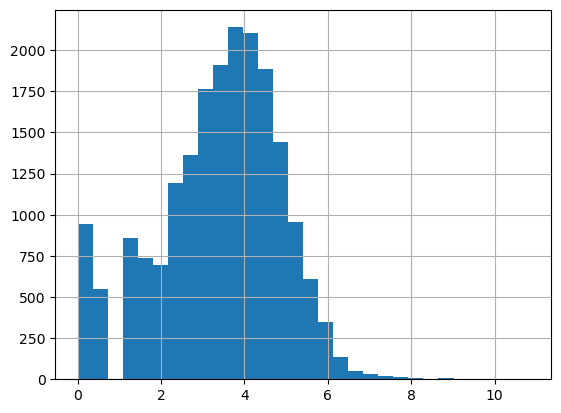

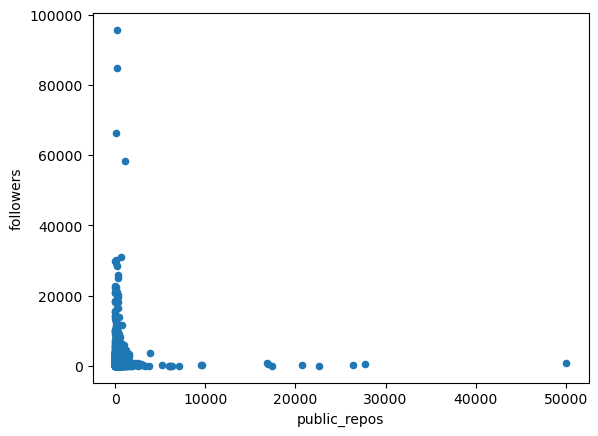

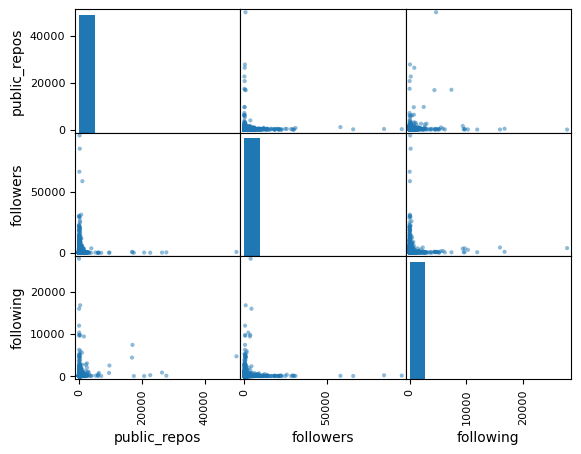

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('github_bot_processed_data.csv') 

data['label'].value_counts().plot(kind='bar')
plt.show()

data.groupby('label')[['site_admin','company']].mean().plot(kind='bar',stacked=True)
plt.show()

data['log_public_repos']=data['public_repos'].apply(lambda x:np.log(x+1))  #对数变换
data['log_public_repos'].hist(bins=30)
plt.show()

data.plot(kind='scatter',x='public_repos',y='followers')
plt.show()

pd.plotting.scatter_matrix(data[['public_repos','followers','following']])
plt.show()

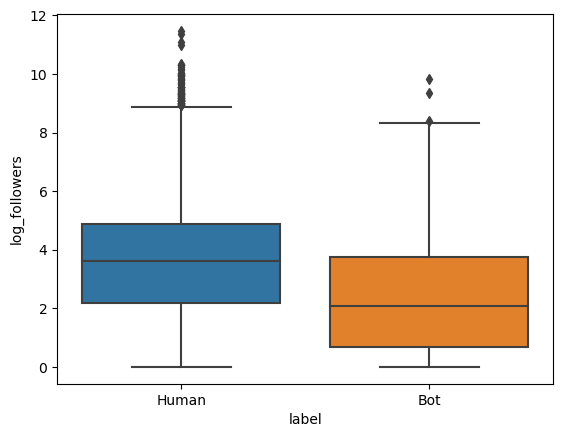

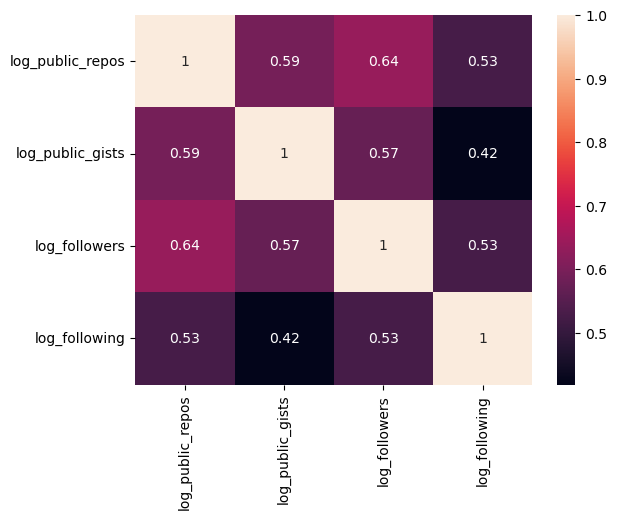

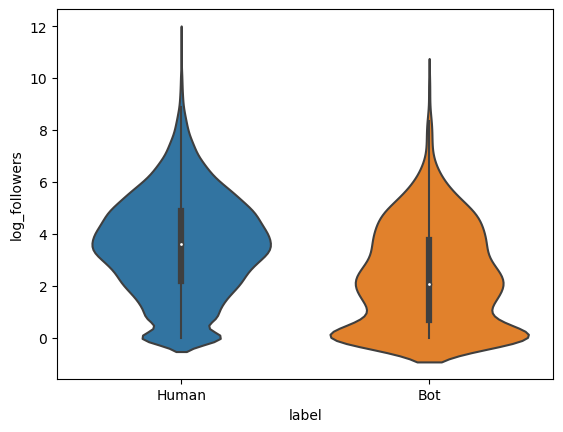

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('github_bot_processed_data.csv')
data['log_followers']=data['followers'].apply(lambda x:np.log(x+1))
sns.boxplot(x='label',y='log_followers',data=data)
plt.show()

#sns.pairplot(data,hue='label') 成对图
#plt.show()

data['log_public_repos']=data['public_repos'].apply(lambda x:np.log(x+1))  #对数变换
data['log_public_gists']=data['public_gists'].apply(lambda x:np.log(x+1))
data['log_followers']=data['followers'].apply(lambda x:np.log(x+1))
data['log_following']=data['following'].apply(lambda x:np.log(x+1))
corr=data[['log_public_repos','log_public_gists','log_followers','log_following']].corr()
sns.heatmap(corr,annot=True)
plt.show()

sns.violinplot(x='label',y='log_followers',data=data)
plt.show()

In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('github_bot_processed_data.csv')
profile=ProfileReport(data,title="Pandas Profiling Report")
profile.to_file("report.html")

ModuleNotFoundError: No module named 'pandas_profiling'